In [69]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

8000


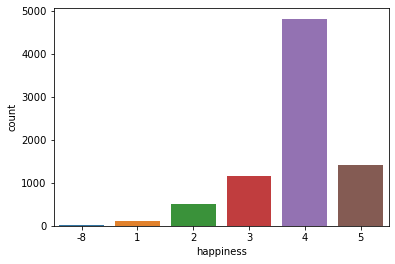

In [70]:
# 处理幸福度 这是分类的tag 需要独立出来 
df_train = pd.read_csv("happiness_train_complete.csv",encoding="ansi")

df_test = pd.read_csv("happiness_test_complete.csv",encoding="ansi")

print(len(df_train))

y_train = df_train['happiness']
y_train = y_train.map(lambda x:3 if x==-8 else x)
# y_train.plot.hist()
sns.countplot(x='happiness', data=df_train)
### 现在这个年龄划分 以及收入等级划分 都是好的 不用改了 

In [3]:
df_train.drop(["happiness"],axis=1,inplace=True)
# 合并在一起方便处理 训练集和测试集
df_all = pd.concat((df_train,df_test),axis=0)

In [4]:

total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['percent']>0]

,total,percent
edu_other,10962,0.999453
invest_other,10923,0.995897
property_other,10879,0.991885
join_party,9842,0.897338
s_work_type,7444,0.678702
s_work_status,7444,0.678702
work_status,6939,0.632659
work_yr,6939,0.632659
work_manage,6938,0.632567
work_type,6938,0.632567


# 一、数据处理

In [5]:
# 将缺失值超过60%的属性删除掉 没有意义
# 删除 一些缺失比例大的特征 在这里 党员被删除 
df_all.drop( ['edu_other','invest_other','property_other','join_party',
              's_work_type','s_work_status','work_status',
              'work_yr','work_manage','work_type',],axis=1,inplace=True)
# # 试着对党员进行处理 党员的觉悟一般都高一些  
# df_all['join_party'].fillna(0,inplace=True)
# df_all['join_party'] = df_all['join_party'].map(lambda x:0 if x<=0 else x)

In [6]:
#全部缺失值填充为0 因为这些缺失值是因为没有结婚而导致的
df_all['s_political'].fillna(0,inplace=True)
df_all['s_hukou'].fillna(0,inplace=True)
df_all['s_income'].fillna(0,inplace=True)
df_all['s_birth'].fillna(0,inplace=True)
df_all['s_edu'].fillna(0,inplace=True)     
df_all['s_work_exper'].fillna(0,inplace=True)


In [7]:
#缺失值是由于没有受过教育造成的
#全部缺失值填充为0
df_all['edu_status'].fillna(0,inplace=True)
df_all['edu_yr'].fillna(0,inplace=True)


In [8]:
#社交情况
#缺失值是由于社交不频繁造成的
#全部缺失值填充为7
df_all['social_friend'].fillna(7,inplace=True)
df_all['social_neighbor'].fillna(7,inplace=True)
print(len(df_all))

10968


In [9]:
# 孩子情况
#全部填充为0,因为没有孩子
df_all['minor_child'].fillna(0,inplace=True)
print(len(df_all))

10968


In [10]:
# 户口情况
#缺失值是由于没有户口造成的
#全部缺失值填充为4
df_all['hukou_loc'].fillna(4,inplace=True)

In [11]:
# 婚姻情况
df_all['marital_now'].fillna(2015,inplace=True) 
df_all['marital_1st'].fillna(2015,inplace=True)

In [12]:
# 家庭收入
#训练集中的family_income只有一条空记录，用平均值填充
df_all['family_income'].fillna(df_all['family_income'].mean(),inplace=True)

In [13]:
#最后再来验证一下处理结果
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['percent']>0]

,total,percent


# 二 特征处理

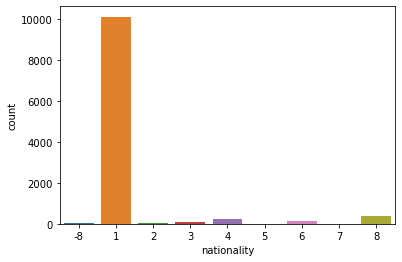

In [14]:
#民族分布不均匀 删除
sns.countplot(x='nationality', data=df_all)
# df_all.drop(['nationality'],axis=1,inplace=True)
#不删民族试试看  发现效果不错 于是不删民族 

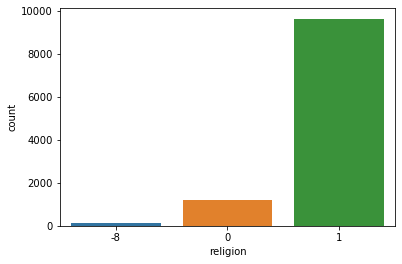

In [15]:
#宗教不均匀
sns.countplot(x='religion', data=df_all)
df_all.drop(['religion','religion_freq'],axis=1,inplace=True)
#试着处理宗教频率  结果告诉我们不好 
# def freq_cut(x):
#     if x<2:
#         return 0
#     elif x<5:
#         return 1
#     else:
#         return 2
# df_all['religion_freq'] = df_all['religion_freq'].map(freq_cut)
# sns.countplot(x='religion_freq', data=df_all)

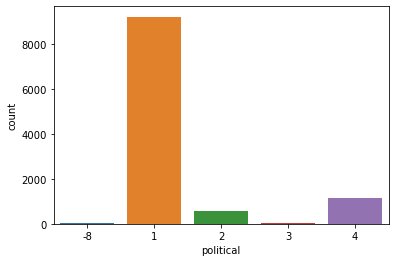

In [16]:
#政治面貌不均匀
sns.countplot(x='political', data=df_all)
# df_all.drop(['political'],axis=1,inplace=True)

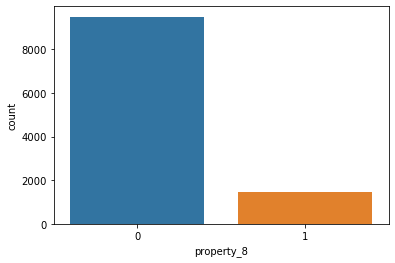

In [17]:
#房产不均匀，只保留property_1和property_2
# sns.countplot(x='property_0', data=df_all)
# sns.countplot(x='property_1', data=df_all)
# sns.countplot(x='property_2', data=df_all)
# sns.countplot(x='property_3', data=df_all)
# sns.countplot(x='property_4', data=df_all)
# sns.countplot(x='property_5', data=df_all)
# sns.countplot(x='property_6', data=df_all)
# sns.countplot(x='property_7', data=df_all)
sns.countplot(x='property_8', data=df_all)
df_all.drop(['property_0','property_3','property_4','property_5',
             'property_6','property_7','property_8'],axis=1,inplace=True)
#尝试保留8


In [18]:
# health_problem和health 与happiness 看起来比较相像
# 即使重复也不要删除 留着 是有提高的 
# sns.countplot(x='health_problem', data=df_all)
# sns.countplot(x='health', data=df_all)
# df_all.drop(['health'],axis=1,inplace=True)

In [19]:
#media_1，2，3分布一样，只保留media_1
# 都保留 有提高 
# sns.countplot(x='media_1', data=df_all)
# sns.countplot(x='media_2', data=df_all)
# sns.countplot(x='media_3', data=df_all)
# sns.countplot(x='media_4', data=df_all)
# sns.countplot(x='media_5', data=df_all)
# sns.countplot(x='media_6', data=df_all)
# sns.countplot(x='media_2', data=df_all)
# df_all.drop(['media_2','media_3'],axis=1,inplace=True)

In [20]:
#社保里面商业保险只保留一个，删除insur_3,4
# sns.countplot(x='insur_1', data=df_all)
# sns.countplot(x='insur_2', data=df_all)
# sns.countplot(x='insur_3', data=df_all)
# sns.countplot(x='insur_4', data=df_all)
df_all.drop(['insur_1','insur_2','insur_3','insur_4'],axis=1,inplace=True)

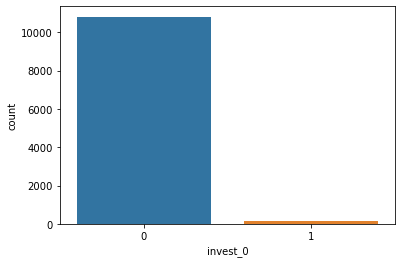

In [21]:
#基本没人投资，全部删除
sns.countplot(x='invest_0', data=df_all)
# sns.countplot(x='invest_1', data=df_all)
# sns.countplot(x='invest_2', data=df_all)
# sns.countplot(x='invest_3', data=df_all)
# sns.countplot(x='invest_4', data=df_all)
# sns.countplot(x='invest_5', data=df_all)
df_all.drop(['invest_0','invest_1','invest_2','invest_3','invest_4',
             'invest_5'],axis=1,inplace=True)
# 不 我们这里保存 invest1和invest2 因为相关性挺高的 
# 原来是都删除 还是不行 留下2 其余都删除试试看
# 结果告诉我们 还是全部删除最好
# 再一次保留invest1和invest2 

In [22]:
#删除父母亲的政治面貌
# sns.countplot(x='f_political', data=df_all)
# sns.countplot(x='f_work_14', data=df_all)
# sns.countplot(x='m_political', data=df_all)
# sns.countplot(x='m_work_14', data=df_all)
df_all.drop(['f_political','m_political'],axis=1,inplace=True)


# 新特征构造

In [23]:
# def city_split(x):
#     if x in [33,37]:
#         return 0
#     elif x in [4,6]:
#         return 0
#     elif x in [15,16,67]:
#         return 1
#     elif x in [36,12,13,81,61,1]:
#         return 1
#     elif x in [76,14,82,65,35,72,19,63,87]:
#         return 2
#     elif x in [89,41,32,2,71,46,47]:
#         return 2
#     elif x in [75,64,51,88,74,66,31,83]:
#         return 3
#     elif x in [28,21,84,3,34,29,70,45,5]:
#         return 3
#     elif x in [22,79,54,23,44,11,17]:
#         return 4
#     elif x in [18,42,50,26,56,80,39,85,57,8,55]:
#         return 4
#     elif x in [69,77,68,20,53,10,59,27,52,40,43,78,7,9,6]:
#         return 5
#     elif x in [24,86,49,48,30]:
#         return 5
#     elif x in [25]:
#         return 6
#     else:
#         return 3
    
# df_all["city_s"]=df_all["city"].map(city_split)
# sns.countplot(x='city_s', data=df_all)

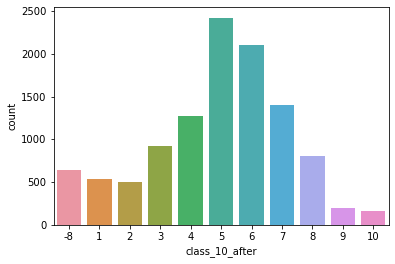

In [24]:
df_all['class'] = df_all['class'].map(lambda x:5 if x==-8 else x)
# df_all['class_10_after'] = df_all['class_10_after'].map(lambda x:5 if x==-8 else x)
# df_all['class_10_before'] = df_all['class_10_before'].map(lambda x:5 if x==-8 else x)
# df_all['view'] = df_all['view'].map(lambda x:3 if x==-8 else x)
# df_all['socialize'] = df_all['socialize'].map(lambda x:3 if x==-8 else x)
# df_all['inc_ability'] = df_all['inc_ability'].map(lambda x:4 if x==-8 else x)
sns.countplot(x='class_10_after', data=df_all)
# sns.countplot(x='join_party', data=df_all)
#join_party 已被删除
# sns.countplot(x='political', data=df_all)
# df_all.drop(['leisure_6'],axis=1,inplace=True)
# sns.countplot(x='learn', data=df_all)
# sns.countplot(x='political', data=df_all)
# sns.countplot(x='family_status', data=df_all)
# sns.countplot(x='health', data=df_all)
# sns.countplot(x='health_problem', data=df_all)
# df_all['relax'] = df_all['relax'].map(lambda x:1 if x==-8 else x)
# df_all['learn'] = df_all['learn'].map(lambda x:1 if x==-8 else x)
# sns.countplot(x='relax', data=df_all)
# 这是 关于 -8的处理
# sns.countplot(x='s_edu', data=df_all)
# 照样 根据之前的那个教育划分 应该还会有突破
# 问题在于 这影响比较大的 都有-8

In [25]:
# 第一次看到取平均值的特征构造 试试看
# df_all['leisure'] = df_all['leisure_1']+df_all['leisure_2']+df_all['leisure_3']+df_all['leisure_4']+df_all['leisure_5']+df_all['leisure_6']
# +df_all['leisure_7']+df_all['leisure_8']+df_all['leisure_9']+df_all['leisure_10']+df_all['leisure_11']+df_all['leisure_12']
# df_all['leisure'] = df_all['leisure'].map(lambda x:x/12)
# sns.countplot(x='leisure', data=df_all)

In [26]:
# 试着对edu_yr进行分类
# edu_yr 哪一年取得最高学历 
# df_all['edu_yr'] = df_all['edu_yr'].map(lambda x:0 if x<0 else x)
# df_all['edu_yr'] = 2015-df_all['edu_yr']
# # # 由于前期被0填充过 
# df_all['edu_yr'] = df_all['edu_yr'].map(lambda x:0 if x>=2015 else x)
# df_all['edu_yr']
# sns.countplot(x='edu_yr', data=df_all)
# 额实际上没有用 

In [27]:
# 试着对class分类 然而结果告诉我们不行 
# def class_cut(x):
#     if x in [1,2]:
#         return 1
#     elif x in [3,4]:
#         return 2
#     elif x in [5,6]:
#         return 3
#     elif x in [7,8]:
#         return 4
#     elif x in [9,10]:
#         return 5
# df_all["class"]=df_all["class"].map(class_cut)
#删除 class 已覆盖 不用删除
# df_all.drop(['s_edu'],axis=1,inplace=True)

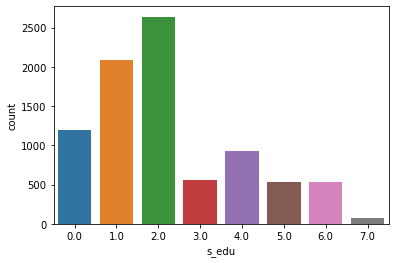

In [28]:
df_all['edu'] = df_all['edu'].map(lambda x:0 if x==-8 else x)
# df_all['edu'] = df_all['edu'].map(lambda x:0 if x==14 else x)
# sns.countplot(x='edu', data=df_all)
def edu_split(x):
    if x in [1,2,14]:
        return 0
    elif x in [3]:
        return 1
    elif x in [4]:
        return 2
    elif x in [5,7,8]:
        return 3
    elif x in [6]:
        return 4
    elif x in [9,10]:
        return 5
    elif x in [11,12]:
        return 6
    elif x in[13]:
        return 7
df_all["edu"]=df_all["edu"].map(edu_split)
# sns.countplot(x='edu_s', data=df_all)
# 既然 对edu分级 那么就应该 除掉 edu
df_all.drop(['edu'],axis=1,inplace=True)
# 对其配偶
df_all["s_edu"] = df_all["s_edu"].map(edu_split)
sns.countplot(x='s_edu', data=df_all)
df_all.drop(['s_edu'],axis=1,inplace=True)


In [29]:
df_all['survey_time'] = pd.to_datetime(df_all['survey_time'],format='%Y-%m-%d %H:%M:%S')
df_all["hour"]=df_all["survey_time"].dt.hour

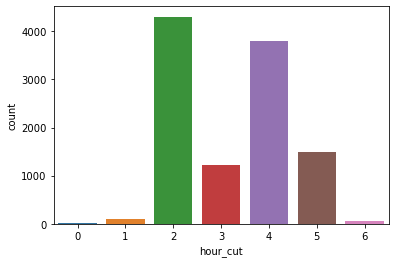

In [30]:
#把一天的时间分段
def hour_cut(x):
    if 0<=x<6:
        return 0
    elif  6<=x<8:
        return 1
    elif  8<=x<12:
        return 2
    elif  12<=x<14:
        return 3
    elif  14<=x<18:
        return 4
    elif  18<=x<21:
        return 5
    elif  21<=x<24:
        return 6

    
df_all["hour_cut"]=df_all["hour"].map(hour_cut)
sns.countplot(x='hour_cut', data=df_all)
# 构造了 hour 和hour_cut 显然 hour应该被删除
df_all.drop(['hour'],axis=1,inplace=True)

In [31]:
#出生的年代
def birth_split(x):
    if(x<1920):
        return 0
    if 1920<=x<=1930:
        return 1
    elif  1930<x<=1940:
        return 2
    elif  1940<x<=1950:
        return 3
    elif  1950<x<=1960:
        return 4
    elif  1960<x<=1970:
        return 5
    elif  1970<x<=1980:
        return 6
    elif  1980<x<=1990:
        return 7
    elif  1990<x<=2000:
        return 8

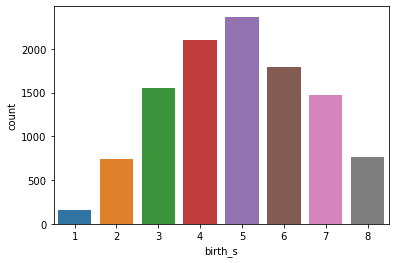

In [32]:
df_all["birth_s"]=df_all["birth"].map(birth_split)
sns.countplot(x='birth_s', data=df_all)

In [33]:
# 年龄划分
def age_class(x):
    if(x<0):
        return 0
    elif(x>0 and x<=16):
        return 1
    elif(x>16 and x<=32):
        return 2
    elif(x>32 and x<=48):
        return 3
    elif(x>48 and x<=64):
        return 4
    elif(x>64 and x<=80):
        return 5
    elif(80<x<=96):
        return 6
    else:
        return 7

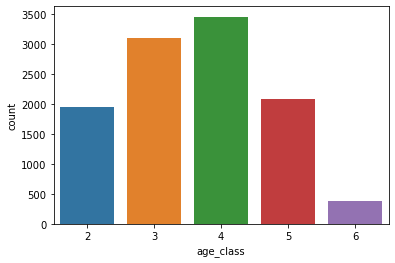

In [34]:
#转换时间格式,求出每个人的年龄
df_all['age']=pd.to_datetime(df_all['survey_time']).dt.year-df_all['birth']
df_all["age_class"]=df_all['age'].map(age_class)
sns.countplot(x='age_class', data=df_all)

# df_all['age'].value_counts()

In [35]:
# 既然已对年龄分了级 那么就应该去掉age
df_all.drop(['age'],axis=1,inplace=True)

In [36]:
def  get_fat(x):
    if(x<0):
        return 1
    elif(x>0 and x<18.5):
        return 1
    elif(x>=18.5 and x<=23.9):
        return 2 
    elif(x>=24 and x<=26.9):
        return 3
    elif(x>26.9 and x<29.9):
        return 4
    else:
        return 5

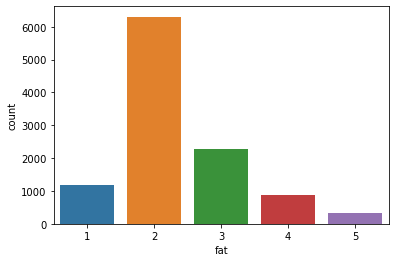

In [37]:
# 增加BMI
# 体重/身高的平方（国际单位kg/㎡）
# 这边确实厘米和斤 
height = df_all["height_cm"]/100
kg = df_all["weight_jin"]/2
# print(kg)
# print(height)
bmi = kg/pow(height,2)
# print(bmi)
df_all["bmi"] = bmi
# df_all["bmi"] = df_all["bmi"].map(lambda x:2*x if x<=14 else x)
# df_all['relax'] = df_all['relax'].map(lambda x:1 if x==-8 else x)
df_all["fat"] = df_all["bmi"].map(get_fat)
# sns.countplot(x='bmi', data=df_all)
# 水平分为三类 再将
# <27 为0 大于27 为1 代表肥胖
# df_all["bmi"].value_counts()
sns.countplot(x='fat', data=df_all)
df_all.drop(['bmi'],axis=1,inplace=True)

In [38]:
# 既然已经得到了fat 那么就没有在留着体重的必要了
df_all.drop(['weight_jin'],axis=1,inplace=True)
# 试着不删除 因为听很重要这个条件

In [39]:
# 收入分级
def get_income_class(x):
    if(x<=0):
        return 0
    if 0< x < 2800:
        return  1
    elif 2800<= x <10000:
        return 2
    elif 10000 <= x <27000:
        return 3
    elif 27000<= x <100000:
        return 4
    else : return 5

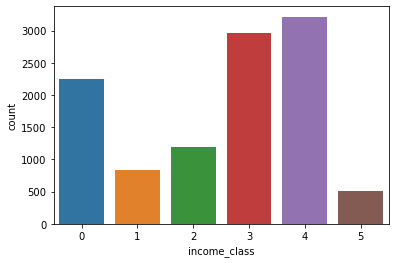

In [40]:
#再对收入进行分级
# df_all['equity'] = df_all['equity'].map(lambda x:3 if x==-8 else x)
df_all["income"] = df_all["income"].map(lambda x:0 if x<0 else x)
df_all["income_class"] = df_all["income"].map(get_income_class)
# df_all["s_income"] = df_all["s_income"].map(get_income_class)
sns.countplot(x='income_class', data=df_all)
# 我的天 之前没有删除收入 现在删除来看看
# df_all.drop(['income'],axis=1,inplace=True)
# 新特征 人均收入 
# df_all['aver_income'] = df_all["family_income"]/df_all['family_m']

In [41]:
# 既然已对收入分了级 那么也就不应该保留income
df_all.drop(['income'],axis=1,inplace=True)

In [42]:
# 对住房面积进行划分
def floor_area_split(x):
    if(x<=0):
        return 0
    if 0<x<15:
        return 1
    elif 15<=x<30:
        return 2
    elif 30<=x<50:
        return 3
    elif 50<=x<80:
        return 4
    elif 80<=x<96:
        return 5
    elif 96<=x<110:
        return 6
    elif 110<=x<130:
        return 7
    elif 130<=x<200:
        return 8
    elif x>=200:
        return 9

In [43]:
df_all["floor_area_s"]=df_all["floor_area"].map(floor_area_split)
# df_all["floor_area_s"]
# sns.countplot(x='floor_area_s', data=df_all)
#不对住房面积进行划分 效果不好 还是划分比较好 

In [44]:
# 对省份进行分级
def province_split(x):
    if x in [6,1,12,28,13]:
        return 0
    elif x in [24,29,26,2,8,22,21]:
        return 1
    elif x in [16,31]:
        return 2
    elif x in [9,7,15,11,18,30,27,19]:
        return 3
    elif x in [23,5,10,4,3,17,4]:
        return 4

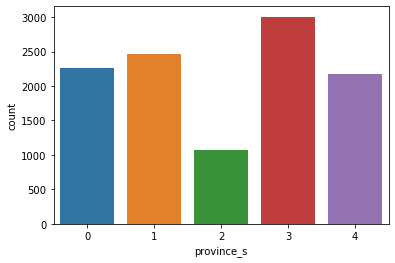

In [45]:
df_all["province_s"]=df_all["province"].map(province_split)
sns.countplot(x='province_s', data=df_all)

In [46]:
# 既然已对省份划分 那么省去省份这个属性
df_all.drop(['province'],axis=1,inplace=True)
# 顺便再把city和county去掉 不能去 去掉后 准确度降低
# sns.countplot(x='city', data=df_all)
# df_all.drop(['city','county'],axis=1,inplace=True)

In [47]:
# 人均住房面积 
df_all['aver_area']=df_all['floor_area']/df_all['family_m']
# df_all["aver_area_class"]=df_all["aver_area"].map(average_area)
# sns.countplot(x='aver_area_class', data=df_all)
# df_all['aver_area'].value_counts()

In [48]:
# 删除住房面积,人居住房面积
df_all.drop(['floor_area'],axis=1,inplace=True)

In [49]:
df_all.drop(['id'],axis=1,inplace=True)
df_all.drop(['survey_time','birth'],axis=1,inplace=True)

In [50]:
def mar_yr_class(x):
    if(x<=0):
        return 0;
    elif(0<x<=7):
        return 1;
    elif(7<x<=14):
        return 2;
    elif(14<x<21):
        return 3;
    elif(21<x<=28):
        return 4;
    elif(28<x<=35):
        return 5;
    elif(35<x<=42):
        return 6;
    elif(42<x<=49):
        return 7;
    elif(49<x<56):
        return 8;

In [51]:
# #删除其他时间数据

df_all['mar_yr']=2015-df_all['marital_now']
# df_all['mar_yr']=df_all['mar_yr'].map(mar_yr_class)
# sns.countplot(x='mar_yr', data=df_all)

df_all.drop(['s_birth','f_birth','m_birth'],axis=1,inplace=True)
df_all.drop(['marital_now'],axis=1,inplace=True)
# df_all.drop(['floor_area'],axis=1,inplace=True)
# df_all.drop(['height_cm'],axis=1,inplace=True)

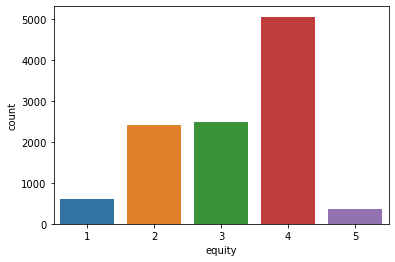

In [52]:
# 公平
df_all['equity'] = df_all['equity'].map(lambda x:3 if x==-8 else x)
sns.countplot(x='equity', data=df_all)

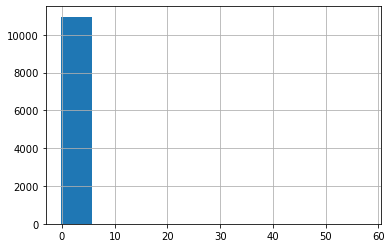

In [53]:
# print(df_all.head())
# 使用z-score方法 进行数据规范化 
numeric_cols=['height_cm','s_income','house','family_income','family_m'
              ,'son','daughter','minor_child','inc_exp','public_service_1',
              'public_service_2','public_service_3','public_service_4',
              'public_service_5','public_service_6','public_service_7',
              'public_service_8','public_service_9','aver_area','mar_yr']
numeric_cols_means=df_all.loc[:,numeric_cols].mean()
# print(numeric_cols_means)
numeric_cols_std=df_all.loc[:,numeric_cols].std()
# print(numeric_cols_std)
df_numeric=(df_all.loc[:,numeric_cols]-numeric_cols_means)/numeric_cols_std
# print(df_numeric)
df_numeric.iloc[:,1].hist()
# df_all.columns.values.tolist()
# 删除id这一列


In [54]:
# 对object类型进行规范化  调用get_dummies函数
df_object=df_all.drop(numeric_cols,axis=1)
# print(df_object.head)
df_object=df_object.astype(str)
for cols in list(df_object.iloc[:,1:].columns):
    df_object=pd.get_dummies(df_object.iloc[:,1:],prefix=cols)
# df_object.iloc[:,1].hist()
# print(df_object.head())

In [55]:
data=pd.concat((df_object,df_numeric),axis=1)

In [56]:
train_data=data.iloc[:8000,:]
test_data=data.iloc[8000:,:]
X_train=train_data.values
X_test=test_data.values
print(len(X_train))
print(len(y_train))
print(len(X_test))

8000
8000
2968


# 模型选择问题

In [57]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, RepeatedKFold

# lgb

In [58]:
param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 19, 
         'objective':'regression',
         'max_depth':9,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.91,
         "bagging_freq": 1,
         "bagging_fraction": 0.75,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.15,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.44459	valid_1's l2: 0.476884
[400]	training's l2: 0.376238	valid_1's l2: 0.454233
[600]	training's l2: 0.335196	valid_1's l2: 0.448973
[800]	training's l2: 0.304091	valid_1's l2: 0.446974
[1000]	training's l2: 0.27831	valid_1's l2: 0.445832
[1200]	training's l2: 0.256543	valid_1's l2: 0.445411
Early stopping, best iteration is:
[1158]	training's l2: 0.26087	valid_1's l2: 0.44515
fold n°2
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.438001	valid_1's l2: 0.509728
[400]	training's l2: 0.369716	valid_1's l2: 0.481255
[600]	training's l2: 0.328808	valid_1's l2: 0.473838
[800]	training's l2: 0.298193	valid_1's l2: 0.471095
[1000]	training's l2: 0.273226	valid_1's l2: 0.469681
[1200]	training's l2: 0.251519	valid_1's l2: 0.469054
Early stopping, best iteration is:
[1133]	training's l2: 0.258554	valid_1's l2: 0.468773
fold n°3
Training until validation scores do

In [59]:
import xgboost as xgb

In [60]:
#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

In [61]:
##### xgb

xgb_params = {"booster":'gbtree','eta': 0.01, 'max_depth': 5, 'subsample': 0.7, 
              'colsample_bytree': 0.6, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 8}
# xgb_params ={'max_depth':[4,5,6],'min_child_weight':list(range(1,6,2))}

folds = KFold(n_splits=2, shuffle=True, random_state=2018)
oof_xgb = np.zeros(8000)
predictions_xgb = np.zeros(2968)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
# print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train_)))

fold n°1


d:\install\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:3.44143	valid_data-rmse:3.42216	train-myFeval:11.8435	valid_data-myFeval:11.7112
Multiple eval metrics have been passed: 'valid_data-myFeval' will be used for early stopping.

Will train until valid_data-myFeval hasn't improved in 200 rounds.
[100]	train-rmse:1.41699	valid_data-rmse:1.41848	train-myFeval:2.00785	valid_data-myFeval:2.01207
[200]	train-rmse:0.786676	valid_data-rmse:0.832274	train-myFeval:0.618858	valid_data-myFeval:0.69268
[300]	train-rmse:0.625929	valid_data-rmse:0.713038	train-myFeval:0.391788	valid_data-myFeval:0.508424
[400]	train-rmse:0.577031	valid_data-rmse:0.692593	train-myFeval:0.332964	valid_data-myFeval:0.479684
[500]	train-rmse:0.549875	valid_data-rmse:0.687393	train-myFeval:0.302363	valid_data-myFeval:0.472509
[600]	train-rmse:0.52856	valid_data-rmse:0.685256	train-myFeval:0.279376	valid_data-myFeval:0.469576
[700]	train-rmse:0.512297	valid_data-rmse:0.684155	train-myFeval:0.262448	valid_data-myFeval:0.468069
[800]	train-rmse:0.497096	valid_da

d:\install\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	train-rmse:1.40946	valid_data-rmse:1.44828	train-myFeval:1.98659	valid_data-myFeval:2.09752
[200]	train-rmse:0.78214	valid_data-rmse:0.854051	train-myFeval:0.611743	valid_data-myFeval:0.729403
[300]	train-rmse:0.621723	valid_data-rmse:0.723399	train-myFeval:0.38654	valid_data-myFeval:0.523306
[400]	train-rmse:0.571819	valid_data-rmse:0.695813	train-myFeval:0.326977	valid_data-myFeval:0.484156
[500]	train-rmse:0.545216	valid_data-rmse:0.687879	train-myFeval:0.297261	valid_data-myFeval:0.473178
[600]	train-rmse:0.524515	valid_data-rmse:0.684785	train-myFeval:0.275116	valid_data-myFeval:0.468931
[700]	train-rmse:0.507121	valid_data-rmse:0.68321	train-myFeval:0.257171	valid_data-myFeval:0.466775
[800]	train-rmse:0.491299	valid_data-rmse:0.682341	train-myFeval:0.241375	valid_data-myFeval:0.465589
[900]	train-rmse:0.476183	valid_data-rmse:0.681992	train-myFeval:0.226751	valid_data-myFeval:0.465113
[1000]	train-rmse:0.462978	valid_data-rmse:0.681659	train-myFeval:0.214349	valid_data-myF

In [62]:
print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train)))

CV score: 0.46392141


In [63]:
from catboost import Pool, CatBoostRegressor

from sklearn.model_selection import train_test_split

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train))
predictions_cb = np.zeros(len(X_test))
kfold = kfolder.split(X_train, y_train)
fold_=0
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.3, random_state=2019)
for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_))
    fold_=fold_+1
    k_x_train = X_train[train_index]
    k_y_train = y_train[train_index]
    k_x_vali = X_train[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'n_estimators': 100000,
         'loss_function': 'RMSE',
         'eval_metric':'RMSE',
         'learning_rate': 0.05,
         'depth': 4,
         'use_best_model': True,
         'subsample': 0.6,
         'bootstrap_type': 'Bernoulli',
         'reg_lambda': 3
    }
    model_cb = CatBoostRegressor(**cb_params)
    #train the model
    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100,early_stopping_rounds=50)
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(X_test, ntree_end=model_cb.best_iteration_) / kfolder.n_splits
print("CV score: {:<8.8f}".format(mean_squared_error(oof_cb, y_train)))


fold n°0
0:	learn: 0.8187759	test: 0.7829818	best: 0.7829818 (0)	total: 63.1ms	remaining: 1h 45m 7s
100:	learn: 0.6904412	test: 0.6811175	best: 0.6811175 (100)	total: 374ms	remaining: 6m 10s
200:	learn: 0.6638549	test: 0.6707397	best: 0.6707201 (199)	total: 668ms	remaining: 5m 31s
300:	learn: 0.6432620	test: 0.6665794	best: 0.6664931 (297)	total: 989ms	remaining: 5m 27s
400:	learn: 0.6278396	test: 0.6640094	best: 0.6640094 (400)	total: 1.41s	remaining: 5m 49s
500:	learn: 0.6129907	test: 0.6623218	best: 0.6623218 (500)	total: 1.76s	remaining: 5m 49s
600:	learn: 0.5993882	test: 0.6612351	best: 0.6612247 (593)	total: 2.14s	remaining: 5m 54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6606504856
bestIteration = 634

Shrink model to first 635 iterations.
fold n°1
0:	learn: 0.8118825	test: 0.8178108	best: 0.8178108 (0)	total: 3.24ms	remaining: 5m 23s
100:	learn: 0.6905405	test: 0.6960020	best: 0.6960020 (100)	total: 334ms	remaining: 5m 30s
200:	learn: 0.6646841	test: 

In [64]:
##模型融合
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn import linear_model
# 将lgb和xgb和ctb的结果进行stacking 三模型融合 
# train_stack = np.vstack([oof_lgb,oof_xgb,oof_cb]).transpose()
# test_stack = np.vstack([predictions_lgb, predictions_xgb,predictions_cb]).transpose()
# 两模型融合 lgb和xgb 这个组合效果很好 0.46477 现在为 0.46372 -0.46345
train_stack = np.vstack([oof_lgb,oof_xgb]).transpose()
test_stack = np.vstack([predictions_lgb,predictions_xgb]).transpose()
# 两模型融合 xgb和cb 这个组合不行
# train_stack = np.vstack([oof_cb,oof_xgb]).transpose()
# test_stack = np.vstack([predictions_cb,predictions_xgb]).transpose()
# 两模型融合 lgb和cb 这个组合 不行
# train_stack = np.vstack([oof_cb,oof_lgb]).transpose()
# test_stack = np.vstack([predictions_cb,predictions_lgb]).transpose()
# 融合的话 就直接该参数就可以了 这样
# 我们 用 lgb cb predict_Lasso
folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = linear_model.BayesianRidge()
    #clf_3 =linear_model.Ridge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_stack, y_train)))

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 0.45887818


In [65]:
test_sub=pd.read_csv("happiness_submit.csv",encoding='ansi')
result=list(predictions)
test_sub["happiness"]=result
test_sub.to_csv("happiness_submit.csv", index=False)